In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils


Using TensorFlow backend.


In [3]:
a = pd.read_csv('array.csv')
p = pd.read_csv('pointers.csv')
f = pd.read_csv('function.csv')
l = pd.read_csv('loop.csv')
vali = pd.read_csv('TensorFlowData.csv')

frames = [a, p, f, l, vali]

data = pd.concat(frames)

#data = pd.read_csv('teste.csv')

In [4]:
data

,Title,Type
0,"Ruby: After inserting arrays into a list, how ...",array
1,Are the subscripts for three-dimensional array...,array
2,java - find all combinations of given numbers ...,array
3,How to extract array of names from array of em...,array
4,List of arrays/pointers c++,array
5,reading from bmp and writing to another bmp fi...,array
6,Returning the values of an 'ndarray' using an ...,array
7,Faster parsing of array in php,array
8,Getting object or array value for Auth on Fire...,array
9,JSON.parse to array,array


In [5]:
data['Type'].value_counts()

array       125
pointers    125
function    125
loop        125
Name: Type, dtype: int64

In [6]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 400
Test size: 100


In [7]:
train_posts = data['Title'][:train_size]
train_tags = data['Type'][:train_size]

test_posts = data['Title'][train_size:]
test_tags = data['Type'][train_size:]

In [8]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [9]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [10]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)


In [11]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [12]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (400, 1000)
x_test shape: (100, 1000)
y_train shape: (400, 4)
y_test shape: (100, 4)


In [14]:
batch_size = 512
epochs = 600

In [15]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#dpt_model = keras.models.Sequential([
   # keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(max_words,)),
   # keras.layers.Dropout(0.5),
   # keras.layers.Dense(512, activation=tf.nn.relu),
   # keras.layers.Dropout(0.5),
  #  keras.layers.Dense(1, activation=tf.nn.sigmoid)
#])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'binary_crossentropy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 320 samples, validate on 80 samples
Epoch 1/600
 - 1s - loss: 0.5689 - acc: 0.7500 - binary_crossentropy: 0.5689 - val_loss: 0.5482 - val_acc: 0.7500 - val_binary_crossentropy: 0.5482
Epoch 2/600
 - 0s - loss: 0.5490 - acc: 0.7500 - binary_crossentropy: 0.5490 - val_loss: 0.5648 - val_acc: 0.7500 - val_binary_crossentropy: 0.5648
Epoch 3/600
 - 0s - loss: 0.5313 - acc: 0.7500 - binary_crossentropy: 0.5313 - val_loss: 0.5792 - val_acc: 0.7500 - val_binary_crossentropy: 0.5792
Epoch 4/600
 - 0s - loss: 0.5121 - acc: 0.7500 - binary_crossentropy: 0.5121 - val_loss: 0.5947 - val_acc: 0.7500 - val_binary_crossentropy: 0.5947
Epoch 5/600
 - 0s - loss: 0.4921 - acc: 0.7500 - binary_crossentropy: 0.4921 - val_loss: 0.6096 - val_acc: 0.7500 - val_binary_crossentropy: 0.6096
Epoch 6/600
 - 0s - loss: 0.4716 - acc: 0.7500 - binary_crossentropy: 0.4716 - val_loss: 0.6236 - val_acc: 0.7500 - val_binary_crossentropy: 0.6236
Epoch 7/600
 - 0s -

 - 0s - loss: 0.0343 - acc: 0.9891 - binary_crossentropy: 0.0343 - val_loss: 0.7234 - val_acc: 0.6594 - val_binary_crossentropy: 0.7234
Epoch 55/600
 - 0s - loss: 0.0323 - acc: 0.9852 - binary_crossentropy: 0.0323 - val_loss: 0.7185 - val_acc: 0.6625 - val_binary_crossentropy: 0.7185
Epoch 56/600
 - 0s - loss: 0.0336 - acc: 0.9891 - binary_crossentropy: 0.0336 - val_loss: 0.7138 - val_acc: 0.6656 - val_binary_crossentropy: 0.7138
Epoch 57/600
 - 0s - loss: 0.0310 - acc: 0.9852 - binary_crossentropy: 0.0310 - val_loss: 0.7092 - val_acc: 0.6719 - val_binary_crossentropy: 0.7092
Epoch 58/600
 - 0s - loss: 0.0296 - acc: 0.9930 - binary_crossentropy: 0.0296 - val_loss: 0.7051 - val_acc: 0.6719 - val_binary_crossentropy: 0.7051
Epoch 59/600
 - 0s - loss: 0.0315 - acc: 0.9859 - binary_crossentropy: 0.0315 - val_loss: 0.7011 - val_acc: 0.6781 - val_binary_crossentropy: 0.7011
Epoch 60/600
 - 0s - loss: 0.0309 - acc: 0.9883 - binary_crossentropy: 0.0309 - val_loss: 0.6976 - val_acc: 0.6844 - va

 - 0s - loss: 0.0171 - acc: 0.9937 - binary_crossentropy: 0.0171 - val_loss: 0.6629 - val_acc: 0.7375 - val_binary_crossentropy: 0.6629
Epoch 110/600
 - 0s - loss: 0.0169 - acc: 0.9906 - binary_crossentropy: 0.0169 - val_loss: 0.6626 - val_acc: 0.7344 - val_binary_crossentropy: 0.6626
Epoch 111/600
 - 0s - loss: 0.0163 - acc: 0.9930 - binary_crossentropy: 0.0163 - val_loss: 0.6627 - val_acc: 0.7344 - val_binary_crossentropy: 0.6627
Epoch 112/600
 - 0s - loss: 0.0191 - acc: 0.9922 - binary_crossentropy: 0.0191 - val_loss: 0.6630 - val_acc: 0.7344 - val_binary_crossentropy: 0.6630
Epoch 113/600
 - 0s - loss: 0.0184 - acc: 0.9891 - binary_crossentropy: 0.0184 - val_loss: 0.6631 - val_acc: 0.7344 - val_binary_crossentropy: 0.6631
Epoch 114/600
 - 0s - loss: 0.0196 - acc: 0.9883 - binary_crossentropy: 0.0196 - val_loss: 0.6635 - val_acc: 0.7344 - val_binary_crossentropy: 0.6635
Epoch 115/600
 - 0s - loss: 0.0160 - acc: 0.9930 - binary_crossentropy: 0.0160 - val_loss: 0.6637 - val_acc: 0.737

Epoch 164/600
 - 0s - loss: 0.0171 - acc: 0.9906 - binary_crossentropy: 0.0171 - val_loss: 0.6919 - val_acc: 0.7406 - val_binary_crossentropy: 0.6919
Epoch 165/600
 - 0s - loss: 0.0171 - acc: 0.9875 - binary_crossentropy: 0.0171 - val_loss: 0.6920 - val_acc: 0.7375 - val_binary_crossentropy: 0.6920
Epoch 166/600
 - 0s - loss: 0.0186 - acc: 0.9867 - binary_crossentropy: 0.0186 - val_loss: 0.6927 - val_acc: 0.7344 - val_binary_crossentropy: 0.6927
Epoch 167/600
 - 0s - loss: 0.0195 - acc: 0.9867 - binary_crossentropy: 0.0195 - val_loss: 0.6938 - val_acc: 0.7344 - val_binary_crossentropy: 0.6938
Epoch 168/600
 - 0s - loss: 0.0174 - acc: 0.9906 - binary_crossentropy: 0.0174 - val_loss: 0.6949 - val_acc: 0.7312 - val_binary_crossentropy: 0.6949
Epoch 169/600
 - 0s - loss: 0.0162 - acc: 0.9914 - binary_crossentropy: 0.0162 - val_loss: 0.6957 - val_acc: 0.7312 - val_binary_crossentropy: 0.6957
Epoch 170/600
 - 0s - loss: 0.0137 - acc: 0.9945 - binary_crossentropy: 0.0137 - val_loss: 0.6968 - 

Epoch 219/600
 - 0s - loss: 0.0177 - acc: 0.9906 - binary_crossentropy: 0.0177 - val_loss: 0.7164 - val_acc: 0.7312 - val_binary_crossentropy: 0.7164
Epoch 220/600
 - 0s - loss: 0.0181 - acc: 0.9875 - binary_crossentropy: 0.0181 - val_loss: 0.7162 - val_acc: 0.7312 - val_binary_crossentropy: 0.7162
Epoch 221/600
 - 0s - loss: 0.0164 - acc: 0.9906 - binary_crossentropy: 0.0164 - val_loss: 0.7157 - val_acc: 0.7312 - val_binary_crossentropy: 0.7157
Epoch 222/600
 - 0s - loss: 0.0183 - acc: 0.9914 - binary_crossentropy: 0.0183 - val_loss: 0.7151 - val_acc: 0.7312 - val_binary_crossentropy: 0.7151
Epoch 223/600
 - 0s - loss: 0.0189 - acc: 0.9859 - binary_crossentropy: 0.0189 - val_loss: 0.7143 - val_acc: 0.7312 - val_binary_crossentropy: 0.7143
Epoch 224/600
 - 0s - loss: 0.0196 - acc: 0.9883 - binary_crossentropy: 0.0196 - val_loss: 0.7131 - val_acc: 0.7312 - val_binary_crossentropy: 0.7131
Epoch 225/600
 - 0s - loss: 0.0169 - acc: 0.9875 - binary_crossentropy: 0.0169 - val_loss: 0.7117 - 

Epoch 274/600
 - 0s - loss: 0.0173 - acc: 0.9937 - binary_crossentropy: 0.0173 - val_loss: 0.7289 - val_acc: 0.7281 - val_binary_crossentropy: 0.7289
Epoch 275/600
 - 0s - loss: 0.0176 - acc: 0.9891 - binary_crossentropy: 0.0176 - val_loss: 0.7297 - val_acc: 0.7281 - val_binary_crossentropy: 0.7297
Epoch 276/600
 - 0s - loss: 0.0157 - acc: 0.9898 - binary_crossentropy: 0.0157 - val_loss: 0.7297 - val_acc: 0.7281 - val_binary_crossentropy: 0.7297
Epoch 277/600
 - 0s - loss: 0.0158 - acc: 0.9875 - binary_crossentropy: 0.0158 - val_loss: 0.7307 - val_acc: 0.7281 - val_binary_crossentropy: 0.7307
Epoch 278/600
 - 0s - loss: 0.0160 - acc: 0.9906 - binary_crossentropy: 0.0160 - val_loss: 0.7305 - val_acc: 0.7281 - val_binary_crossentropy: 0.7305
Epoch 279/600
 - 0s - loss: 0.0154 - acc: 0.9922 - binary_crossentropy: 0.0154 - val_loss: 0.7290 - val_acc: 0.7281 - val_binary_crossentropy: 0.7290
Epoch 280/600
 - 0s - loss: 0.0177 - acc: 0.9859 - binary_crossentropy: 0.0177 - val_loss: 0.7277 - 

Epoch 329/600
 - 0s - loss: 0.0163 - acc: 0.9906 - binary_crossentropy: 0.0163 - val_loss: 0.7340 - val_acc: 0.7250 - val_binary_crossentropy: 0.7340
Epoch 330/600
 - 0s - loss: 0.0191 - acc: 0.9844 - binary_crossentropy: 0.0191 - val_loss: 0.7343 - val_acc: 0.7250 - val_binary_crossentropy: 0.7343
Epoch 331/600
 - 0s - loss: 0.0150 - acc: 0.9922 - binary_crossentropy: 0.0150 - val_loss: 0.7351 - val_acc: 0.7250 - val_binary_crossentropy: 0.7351
Epoch 332/600
 - 0s - loss: 0.0160 - acc: 0.9883 - binary_crossentropy: 0.0160 - val_loss: 0.7361 - val_acc: 0.7250 - val_binary_crossentropy: 0.7361
Epoch 333/600
 - 0s - loss: 0.0192 - acc: 0.9859 - binary_crossentropy: 0.0192 - val_loss: 0.7366 - val_acc: 0.7250 - val_binary_crossentropy: 0.7366
Epoch 334/600
 - 0s - loss: 0.0216 - acc: 0.9781 - binary_crossentropy: 0.0216 - val_loss: 0.7366 - val_acc: 0.7250 - val_binary_crossentropy: 0.7366
Epoch 335/600
 - 0s - loss: 0.0166 - acc: 0.9867 - binary_crossentropy: 0.0166 - val_loss: 0.7365 - 

Epoch 384/600
 - 0s - loss: 0.0144 - acc: 0.9906 - binary_crossentropy: 0.0144 - val_loss: 0.7377 - val_acc: 0.7344 - val_binary_crossentropy: 0.7377
Epoch 385/600
 - 0s - loss: 0.0160 - acc: 0.9891 - binary_crossentropy: 0.0160 - val_loss: 0.7389 - val_acc: 0.7344 - val_binary_crossentropy: 0.7389
Epoch 386/600
 - 0s - loss: 0.0155 - acc: 0.9891 - binary_crossentropy: 0.0155 - val_loss: 0.7399 - val_acc: 0.7344 - val_binary_crossentropy: 0.7399
Epoch 387/600
 - 0s - loss: 0.0161 - acc: 0.9891 - binary_crossentropy: 0.0161 - val_loss: 0.7409 - val_acc: 0.7344 - val_binary_crossentropy: 0.7409
Epoch 388/600
 - 0s - loss: 0.0153 - acc: 0.9906 - binary_crossentropy: 0.0153 - val_loss: 0.7414 - val_acc: 0.7344 - val_binary_crossentropy: 0.7414
Epoch 389/600
 - 0s - loss: 0.0168 - acc: 0.9922 - binary_crossentropy: 0.0168 - val_loss: 0.7429 - val_acc: 0.7344 - val_binary_crossentropy: 0.7429
Epoch 390/600
 - 0s - loss: 0.0151 - acc: 0.9937 - binary_crossentropy: 0.0151 - val_loss: 0.7444 - 

Epoch 439/600
 - 0s - loss: 0.0164 - acc: 0.9937 - binary_crossentropy: 0.0164 - val_loss: 0.7600 - val_acc: 0.7281 - val_binary_crossentropy: 0.7600
Epoch 440/600
 - 0s - loss: 0.0137 - acc: 0.9937 - binary_crossentropy: 0.0137 - val_loss: 0.7588 - val_acc: 0.7281 - val_binary_crossentropy: 0.7588
Epoch 441/600
 - 0s - loss: 0.0141 - acc: 0.9906 - binary_crossentropy: 0.0141 - val_loss: 0.7579 - val_acc: 0.7281 - val_binary_crossentropy: 0.7579
Epoch 442/600
 - 0s - loss: 0.0173 - acc: 0.9867 - binary_crossentropy: 0.0173 - val_loss: 0.7575 - val_acc: 0.7281 - val_binary_crossentropy: 0.7575
Epoch 443/600
 - 0s - loss: 0.0156 - acc: 0.9883 - binary_crossentropy: 0.0156 - val_loss: 0.7570 - val_acc: 0.7281 - val_binary_crossentropy: 0.7570
Epoch 444/600
 - 0s - loss: 0.0168 - acc: 0.9906 - binary_crossentropy: 0.0168 - val_loss: 0.7561 - val_acc: 0.7281 - val_binary_crossentropy: 0.7561
Epoch 445/600
 - 0s - loss: 0.0182 - acc: 0.9875 - binary_crossentropy: 0.0182 - val_loss: 0.7552 - 

Epoch 494/600
 - 0s - loss: 0.0157 - acc: 0.9891 - binary_crossentropy: 0.0157 - val_loss: 0.7546 - val_acc: 0.7281 - val_binary_crossentropy: 0.7546
Epoch 495/600
 - 0s - loss: 0.0166 - acc: 0.9859 - binary_crossentropy: 0.0166 - val_loss: 0.7556 - val_acc: 0.7281 - val_binary_crossentropy: 0.7556
Epoch 496/600
 - 0s - loss: 0.0153 - acc: 0.9906 - binary_crossentropy: 0.0153 - val_loss: 0.7562 - val_acc: 0.7281 - val_binary_crossentropy: 0.7562
Epoch 497/600
 - 0s - loss: 0.0172 - acc: 0.9875 - binary_crossentropy: 0.0172 - val_loss: 0.7569 - val_acc: 0.7281 - val_binary_crossentropy: 0.7569
Epoch 498/600
 - 0s - loss: 0.0159 - acc: 0.9891 - binary_crossentropy: 0.0159 - val_loss: 0.7581 - val_acc: 0.7250 - val_binary_crossentropy: 0.7581
Epoch 499/600
 - 0s - loss: 0.0161 - acc: 0.9891 - binary_crossentropy: 0.0161 - val_loss: 0.7591 - val_acc: 0.7250 - val_binary_crossentropy: 0.7591
Epoch 500/600
 - 0s - loss: 0.0177 - acc: 0.9859 - binary_crossentropy: 0.0177 - val_loss: 0.7603 - 

Epoch 549/600
 - 0s - loss: 0.0148 - acc: 0.9906 - binary_crossentropy: 0.0148 - val_loss: 0.7751 - val_acc: 0.7219 - val_binary_crossentropy: 0.7751
Epoch 550/600
 - 0s - loss: 0.0160 - acc: 0.9875 - binary_crossentropy: 0.0160 - val_loss: 0.7764 - val_acc: 0.7188 - val_binary_crossentropy: 0.7764
Epoch 551/600
 - 0s - loss: 0.0146 - acc: 0.9906 - binary_crossentropy: 0.0146 - val_loss: 0.7780 - val_acc: 0.7188 - val_binary_crossentropy: 0.7780
Epoch 552/600
 - 0s - loss: 0.0134 - acc: 0.9953 - binary_crossentropy: 0.0134 - val_loss: 0.7789 - val_acc: 0.7188 - val_binary_crossentropy: 0.7789
Epoch 553/600
 - 0s - loss: 0.0158 - acc: 0.9828 - binary_crossentropy: 0.0158 - val_loss: 0.7800 - val_acc: 0.7188 - val_binary_crossentropy: 0.7800
Epoch 554/600
 - 0s - loss: 0.0154 - acc: 0.9875 - binary_crossentropy: 0.0154 - val_loss: 0.7807 - val_acc: 0.7188 - val_binary_crossentropy: 0.7807
Epoch 555/600
 - 0s - loss: 0.0149 - acc: 0.9906 - binary_crossentropy: 0.0149 - val_loss: 0.7816 - 

In [17]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Pontuação do teste:', score[0])
print('Teste de acurácia:', score[1])

100/100 [==============================] - 0s 93us/step
Test score: 0.13339181244373322
Test accuracy: 0.9375


In [52]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Rótulo real:' + test_tags.iloc[i])
    print("Rótulo previsto: " + predicted_label + "\n")

how to remove jquery filter from function ...
Rótulo real:function
Rótulo previsto: function

Creating an infinite MP4 with FFMPEG (not looping) ...
Rótulo real:loop
Rótulo previsto: loop

java - find all combinations of given numbers in a ...
Rótulo real:array
Rótulo previsto: array

Whats wrong with this program in C? It terminates. ...
Rótulo real:pointers
Rótulo previsto: pointers

Passing vector to function (pointers/addresses) ...
Rótulo real:pointers
Rótulo previsto: pointers

How to extract array of names from array of email  ...
Rótulo real:array
Rótulo previsto: array

in_array function not working as expected ...
Rótulo real:function
Rótulo previsto: array

not able to understand the testing condition in th ...
Rótulo real:loop
Rótulo previsto: loop

Print a function name within a function ...
Rótulo real:function
Rótulo previsto: function

R alternatives to looping for more than 10 million ...
Rótulo real:loop
Rótulo previsto: loop



In [53]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [54]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo real', fontsize=15)
    plt.xlabel('Rótulo previsto', fontsize=15)

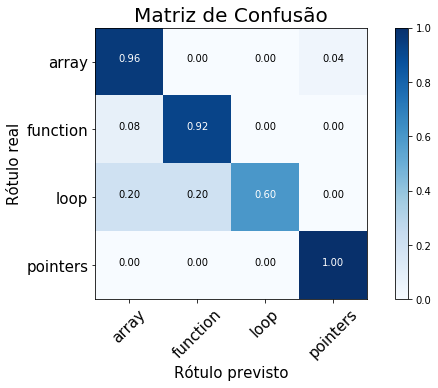

In [55]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Matriz de Confusão")
plt.show()

In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_binary_crossentropy', 'loss', 'acc', 'binary_crossentropy'])

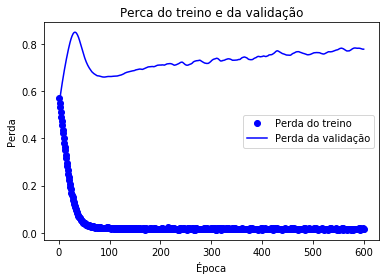

In [57]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Perda do treino')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Perda da validação')
plt.title('Perca do treino e da validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()

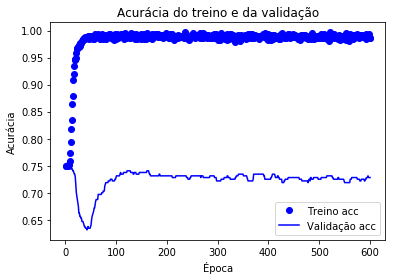

In [58]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Treino acc')
plt.plot(epochs, val_acc, 'b', label='Validação acc')
plt.title('Acurácia do treino e da validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()